This notebook demos how to use Python and Julia in the same notebook where both proces can share object. This is addpted from an example written by Steven Johnson and Fernando Pérez. 

In [1]:
%matplotlib inline
%load_ext julia.magic
julia_version = %julia VERSION
julia_version 

Initializing Julia interpreter. This may take some time...


<PyCall.jlwrap 0.6.0>

In [2]:
%julia @pyimport matplotlib.pyplot as plt
%julia @pyimport numpy as np

Here we use matplotlib and numpy form the Julia interpreter and use these to plot a julia-defined function.

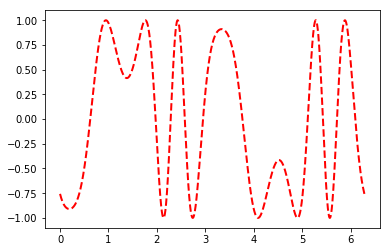

In [3]:
%%julia
                                        # Note how we mix numpy and julia:
t = linspace(0, 2*pi,1000);             # use the julia `linspace` and `pi`
s = sin(3*t + 4*np.cos(2*t));           # use the numpy cosine and julia sine
fig = plt.gcf()                         # **** WATCH THIS VARIABLE ****
plt.plot(t, s, color="red", linewidth=2.0, linestyle="--", label="sin(3t+4.cos(2t))")

We get a handle to the matplotlib figure created by the Julia Interpreter and annotate it from Python. 

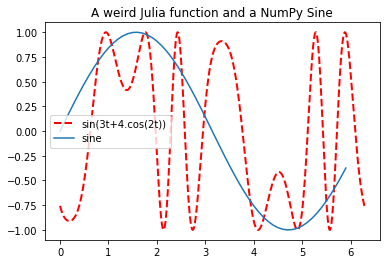

In [4]:
import numpy as np
fig = %julia fig
x = np.arange(0,6, 0.1)
fig.axes[0].plot(x, np.sin(x), label='sine')
fig.axes[0].set_title('A weird Julia function and a NumPy Sine')
fig.axes[0].legend()

fig

We can define the Fibonacci fucntion recusrsively where Python call into Julia and Julia call into Python. 

In [5]:
from __future__ import print_function

# julia fib function
jlfib = %julia _fib(n, pyfib) = n <= 2 ? 1 : pyfib(n-1, _fib) + pyfib(n-2, _fib)

def pyfib(n, _fib):
    if n <= 2:
         r = 1
    else:
        # here we tell julia (_fib) to recurse using Python
        r =  _fib(n-1, pyfib) + _fib(n-2, pyfib)
    return r
fibonacci = lambda x: pyfib(x, jlfib)
fibonacci(10)

55